In [1]:
! pip install plotnine pandas mizani

# https://medium.com/@pablosjv/importing-local-python-modules-into-jupyter-notebooks-87336b2d7746
%load_ext autoreload
%autoreload 2


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



# Articles:
# https://www.kaggle.com/code/residentmario/grammar-of-graphics-with-plotnine-optional?scriptVersionId=4327772
# https://pythonplot.com/


# https://realpython.com/ggplot-python/
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line

economics

(
        ggplot(economics)  # What data to use
        + aes(x="date", y="pop")  # What variable to use
        + geom_line()  # Geometric object to use for drawing
)

In [20]:
import pandas as pd

from data import csv_data

#csv_data

# Calculate additional columns:
csv_data['Add Rate'] = csv_data['Item Count'] * 1_000_000_000 / csv_data['Add Duration Nanos']
csv_data['Search Rate'] = csv_data['Query Count'] * 1_000_000_000 / csv_data['Search Duration Nanos']

# Split the class into parts:
# https://practicaldatascience.co.uk/data-science/how-to-split-strings-using-the-pandas-split-function#:~:text=The%20split()%20function%20has,times%20to%20split%20the%20string.
csv_data[['Class Info', 'Algorithm Test']] = csv_data['Class'].str.split(pat='$', expand=True)
csv_data['Algorithm'] = csv_data['Algorithm Test'].str.replace('Tests', '')

# Remove warmup data:
csv_data = csv_data[csv_data['Scenario'] != 'Warmup']


csv_data


,Class,Test,Display,Timestamp,Range,Queries,Scenario,Item Count,Item Count.1,Add Duration Nanos,Query Count,Search Duration Nanos,file,Add Rate,Search Rate,Class Info,Algorithm,Algorithm Test
1,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,1000,1000,166700,10000,1664200,2023-12-18-21-28-33_index_Random_Gaussian,5.998800e+06,6.008893e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTree,BinaryTreeTests
2,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[3] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,2000,2000,343900,10000,1975000,2023-12-18-21-28-33_index_Random_Gaussian,5.815644e+06,5.063291e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTree,BinaryTreeTests
3,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[4] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,3000,3000,525200,10000,1740400,2023-12-18-21-28-33_index_Random_Gaussian,5.712110e+06,5.745806e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTree,BinaryTreeTests
4,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[5] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,4000,4000,629400,10000,1782800,2023-12-18-21-28-33_index_Random_Gaussian,6.355259e+06,5.609154e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTree,BinaryTreeTests
5,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[6] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,5000,5000,886300,10000,88666300,2023-12-18-21-28-33_index_Random_Gaussian,5.641431e+06,1.127824e+05,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTree,BinaryTreeTests
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,io.nanovc.indexing.examples.x.XIndex1DTests$Li...,index_Random_Linear,[34] Random Linear Sampling Scenario = Large S...,2023-12-19T00:39:10.3495276,1000000.0,10000,Large Some,6000000,6000000,257912600,10000,367033317400,2023-12-19-00-39-10_index_Random_Linear,2.326369e+07,2.724548e+01,io.nanovc.indexing.examples.x.XIndex1DTests,Linear,LinearTests
988,io.nanovc.indexing.examples.x.XIndex1DTests$Li...,index_Random_Linear,[35] Random Linear Sampling Scenario = Large S...,2023-12-19T00:39:10.3495276,1000000.0,10000,Large Some,7000000,7000000,372616400,10000,428006037400,2023-12-19-00-39-10_index_Random_Linear,1.878608e+07,2.336416e+01,io.nanovc.indexing.examples.x.XIndex1DTests,Linear,LinearTests
989,io.nanovc.indexing.examples.x.XIndex1DTests$Li...,index_Random_Linear,[36] Random Linear Sampling Scenario = Large S...,2023-12-19T00:39:10.3495276,1000000.0,10000,Large Some,8000000,8000000,405434300,10000,489259901200,2023-12-19-00-39-10_index_Random_Linear,1.973193e+07,2.043903e+01,io.nanovc.indexing.examples.x.XIndex1DTests,Linear,LinearTests
990,io.nanovc.indexing.examples.x.XIndex1DTests$Li...,index_Random_Linear,[37] Random Linear Sampling Scenario = Large S...,2023-12-19T00:39:10.3495276,1000000.0,10000,Large Some,9000000,9000000,375294100,10000,550836770800,2023-12-19-00-39-10_index_Random_Linear,2.398119e+07,1.815420e+01,io.nanovc.indexing.examples.x.XIndex1DTests,Linear,LinearTests


In [21]:

# https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html#annotated-heatmap

scenarios = csv_data['Scenario'].unique()

plot_data = csv_data.copy()

plot_data['scenario'] = pd.Categorical(plot_data['Scenario'], categories = scenarios)
plot_data.head()




,Class,Test,Display,Timestamp,Range,Queries,Scenario,Item Count,Item Count.1,Add Duration Nanos,Query Count,Search Duration Nanos,file,Add Rate,Search Rate,Class Info,Algorithm,Algorithm Test,scenario
1,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,1000,1000,166700,10000,1664200,2023-12-18-21-28-33_index_Random_Gaussian,5.998800e+06,6.008893e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTree,BinaryTreeTests,Tiny Some
2,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[3] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,2000,2000,343900,10000,1975000,2023-12-18-21-28-33_index_Random_Gaussian,5.815644e+06,5.063291e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTree,BinaryTreeTests,Tiny Some
3,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[4] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,3000,3000,525200,10000,1740400,2023-12-18-21-28-33_index_Random_Gaussian,5.712110e+06,5.745806e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTree,BinaryTreeTests,Tiny Some
4,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[5] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,4000,4000,629400,10000,1782800,2023-12-18-21-28-33_index_Random_Gaussian,6.355259e+06,5.609154e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTree,BinaryTreeTests,Tiny Some
5,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[6] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,5000,5000,886300,10000,88666300,2023-12-18-21-28-33_index_Random_Gaussian,5.641431e+06,1.127824e+05,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTree,BinaryTreeTests,Tiny Some


C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence interva

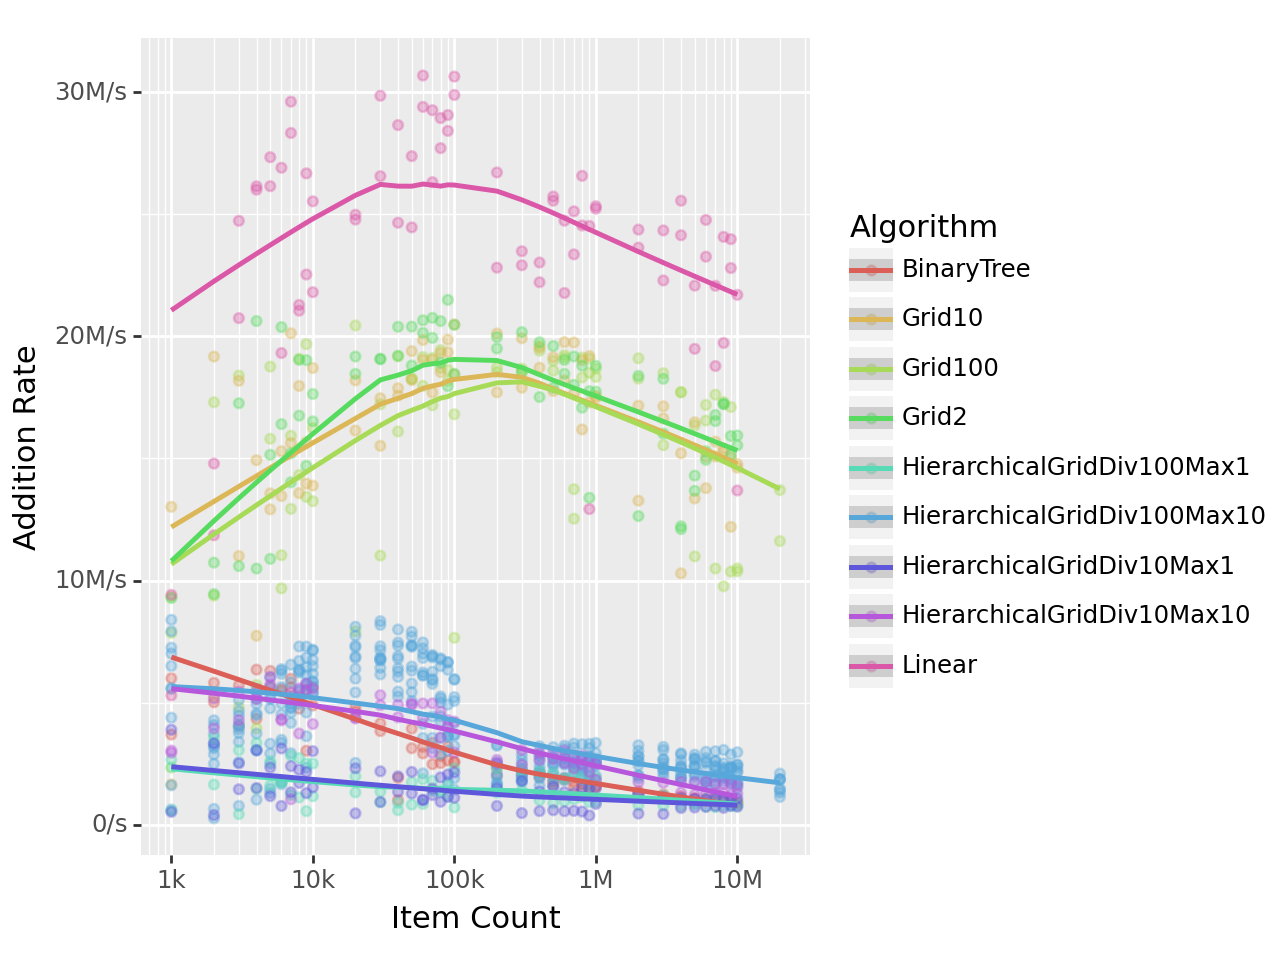

<Figure Size: (640 x 480)>

In [28]:

from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, ggplot, \
    aes, geom_point

(ggplot(plot_data, aes(x="Item Count", y="Add Rate", color="Algorithm"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Addition Rate')
 )

C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence interva

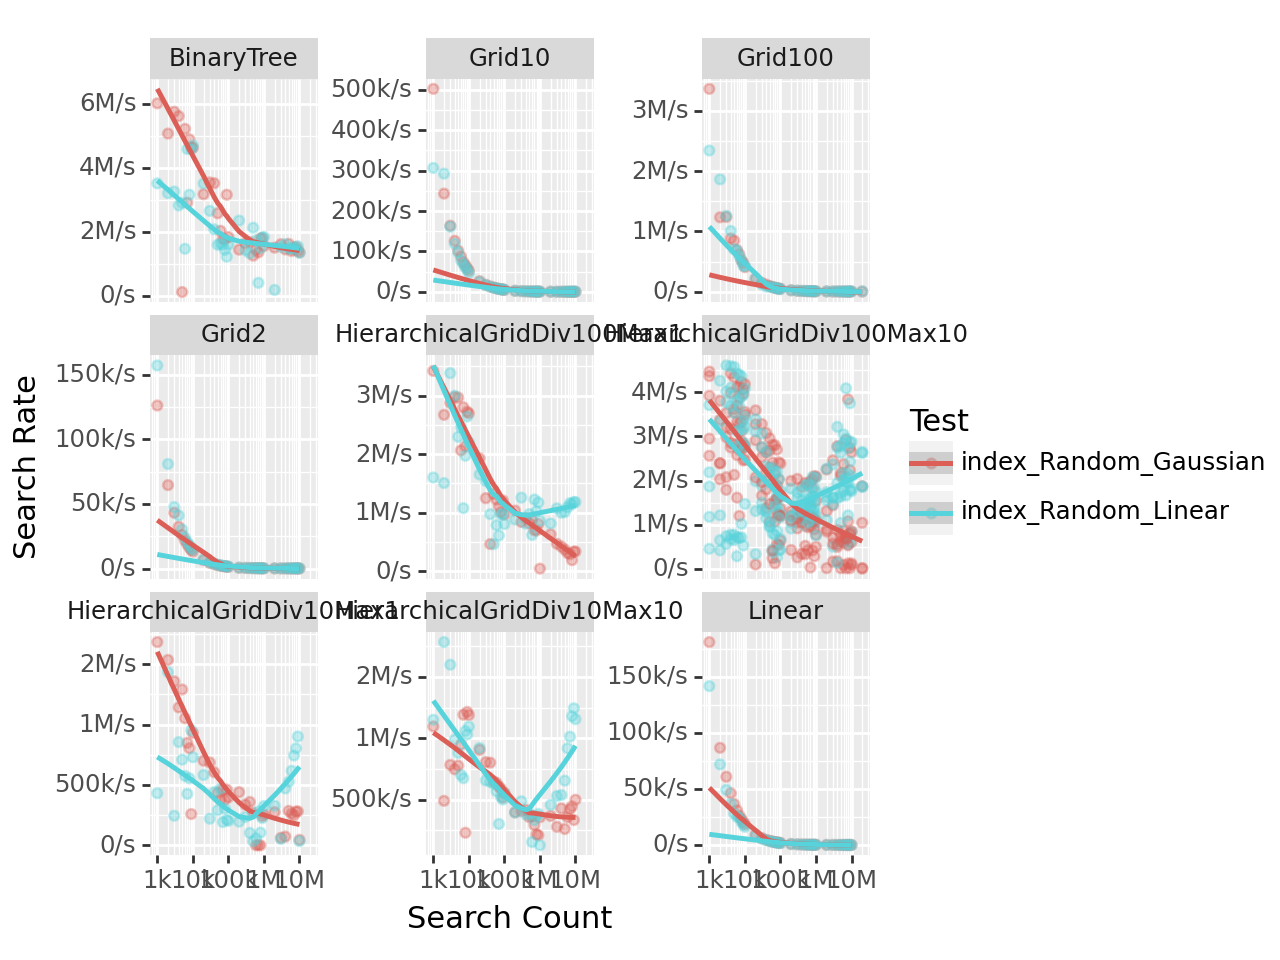

<Figure Size: (640 x 480)>

In [24]:

from formatters.number_suffix_format import number_suffix_format
from plotnine import ggplot, scale_x_log10, geom_smooth, labs, scale_y_continuous, facet_wrap

(ggplot(plot_data, aes(x="Item Count", y="Search Rate", color="Test"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + facet_wrap("Algorithm", scales="free_y")
 + labs(x='Search Count', y='Search Rate')
 )

2k


C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence interva

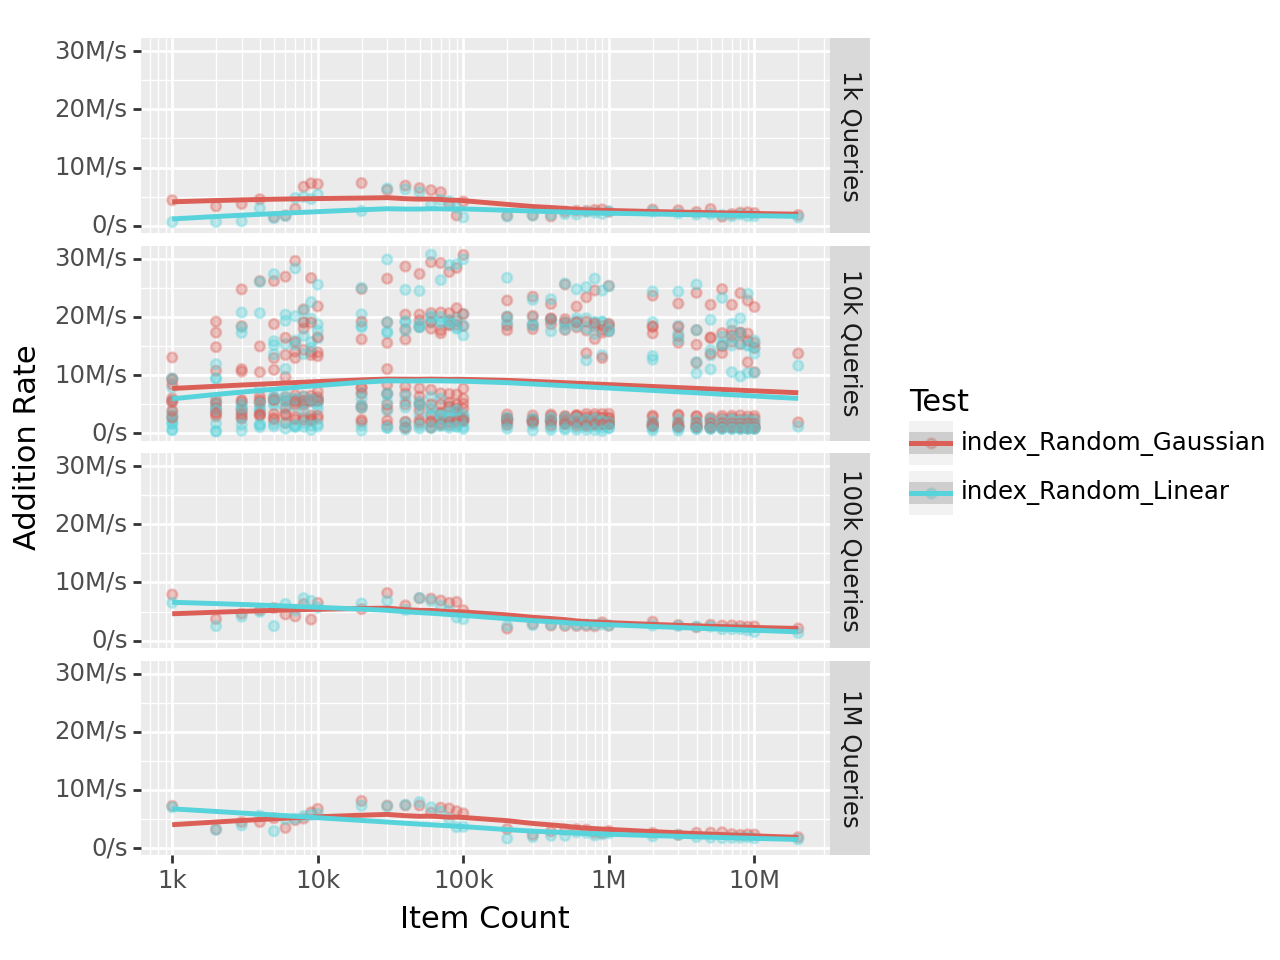

<Figure Size: (640 x 480)>

In [6]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, geom_smooth, labs, scale_y_continuous, \
    facet_grid

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


pretty_Format = number_suffix_format(fmt="{:.0f}")

print (pretty_Format([2134])[0])

def pretty_labeller(x):
    return pretty_Format([int(x)])[0] + " Queries"

(ggplot(plot_data, aes(x="Item Count", y="Add Rate", color="Test"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Addition Rate')
 + facet_grid("Query Count ~ .", labeller=pretty_labeller)
 )

C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence interva

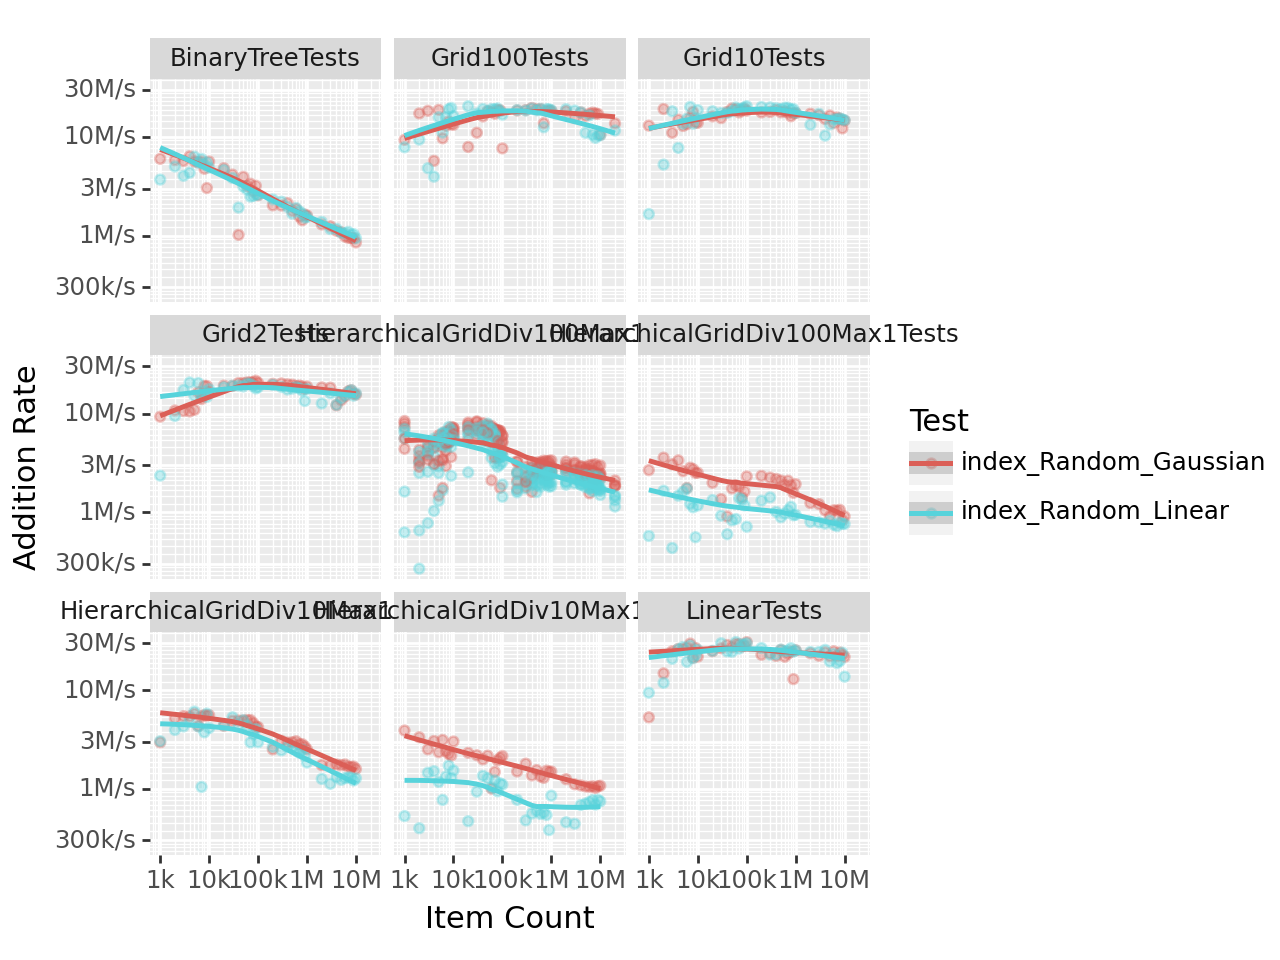

<Figure Size: (640 x 480)>

In [7]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Item Count", y="Add Rate", color="Test"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Addition Rate')
 + facet_wrap("Algorithm")
 )

C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence interva

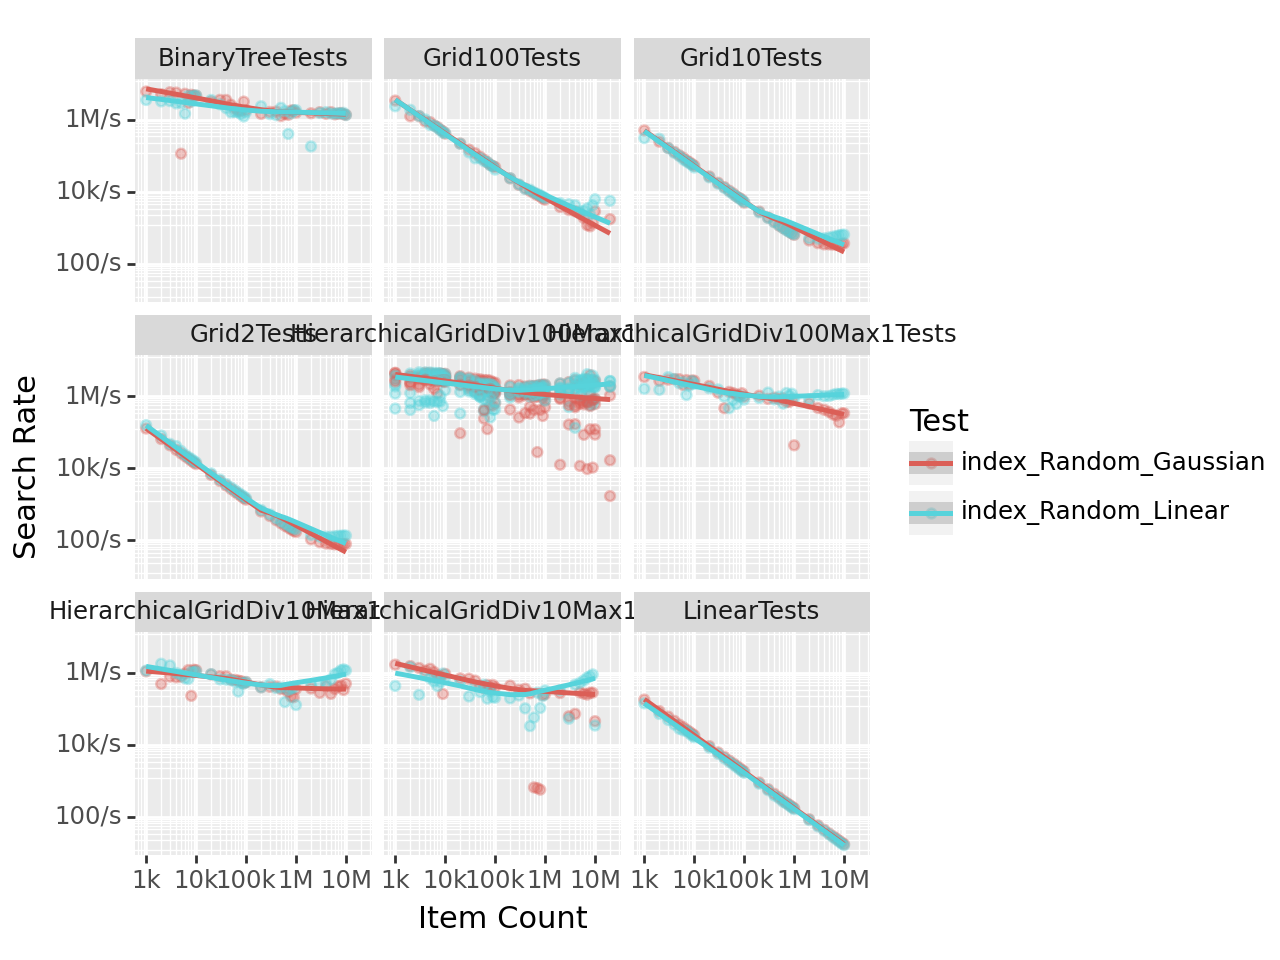

<Figure Size: (640 x 480)>

In [18]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Item Count", y="Search Rate", color="Test"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Search Rate')
 #+ facet_wrap("Algorithm", scales="free_y")
 + facet_wrap("Algorithm", scales="fixed")
 )

C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence interva

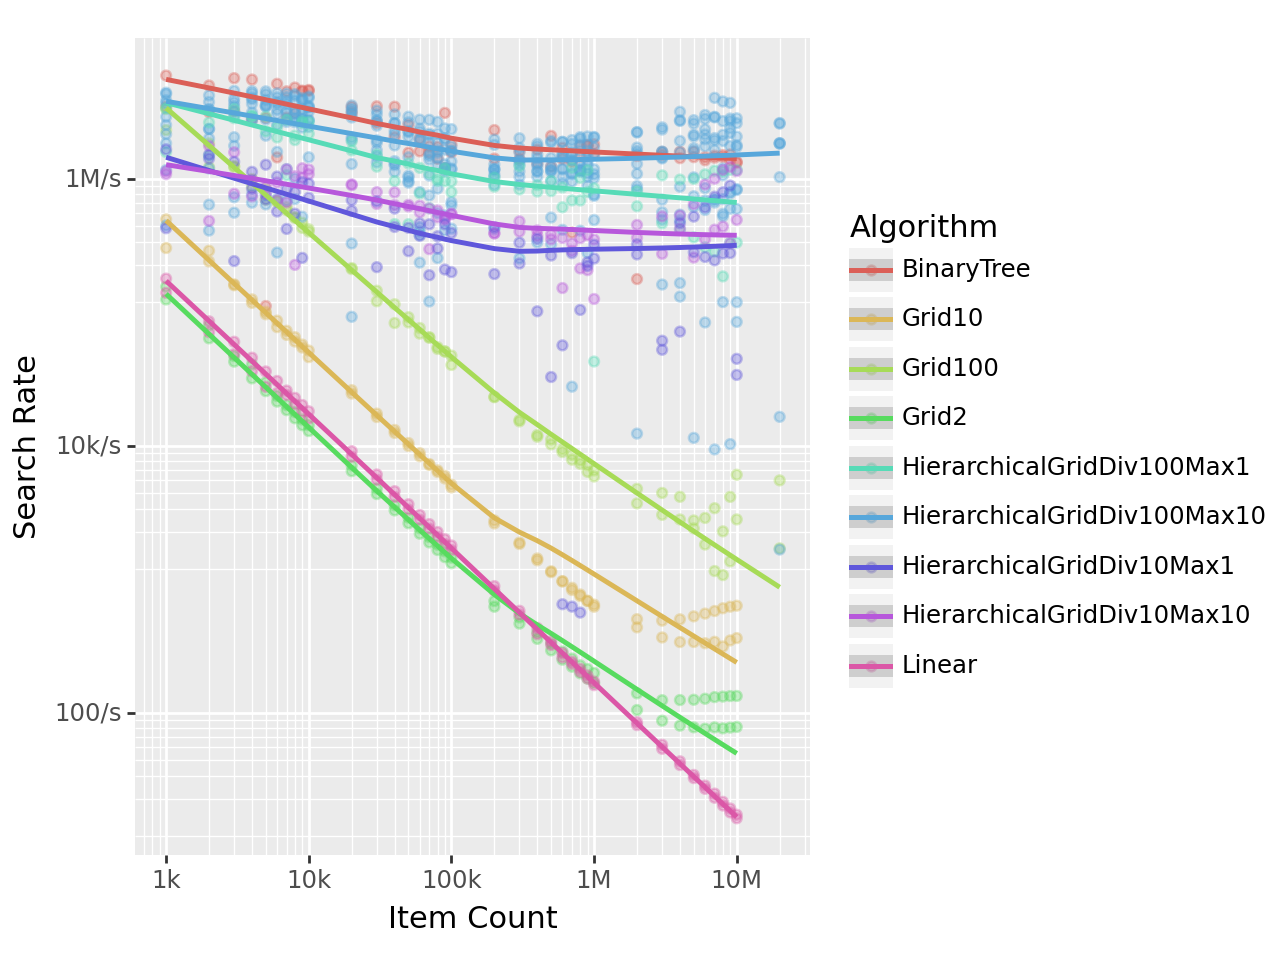

<Figure Size: (640 x 480)>

In [25]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Item Count", y="Search Rate", color="Algorithm"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Search Rate')
 #+ facet_wrap("Test", scales="fixed")
 )

C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence interva

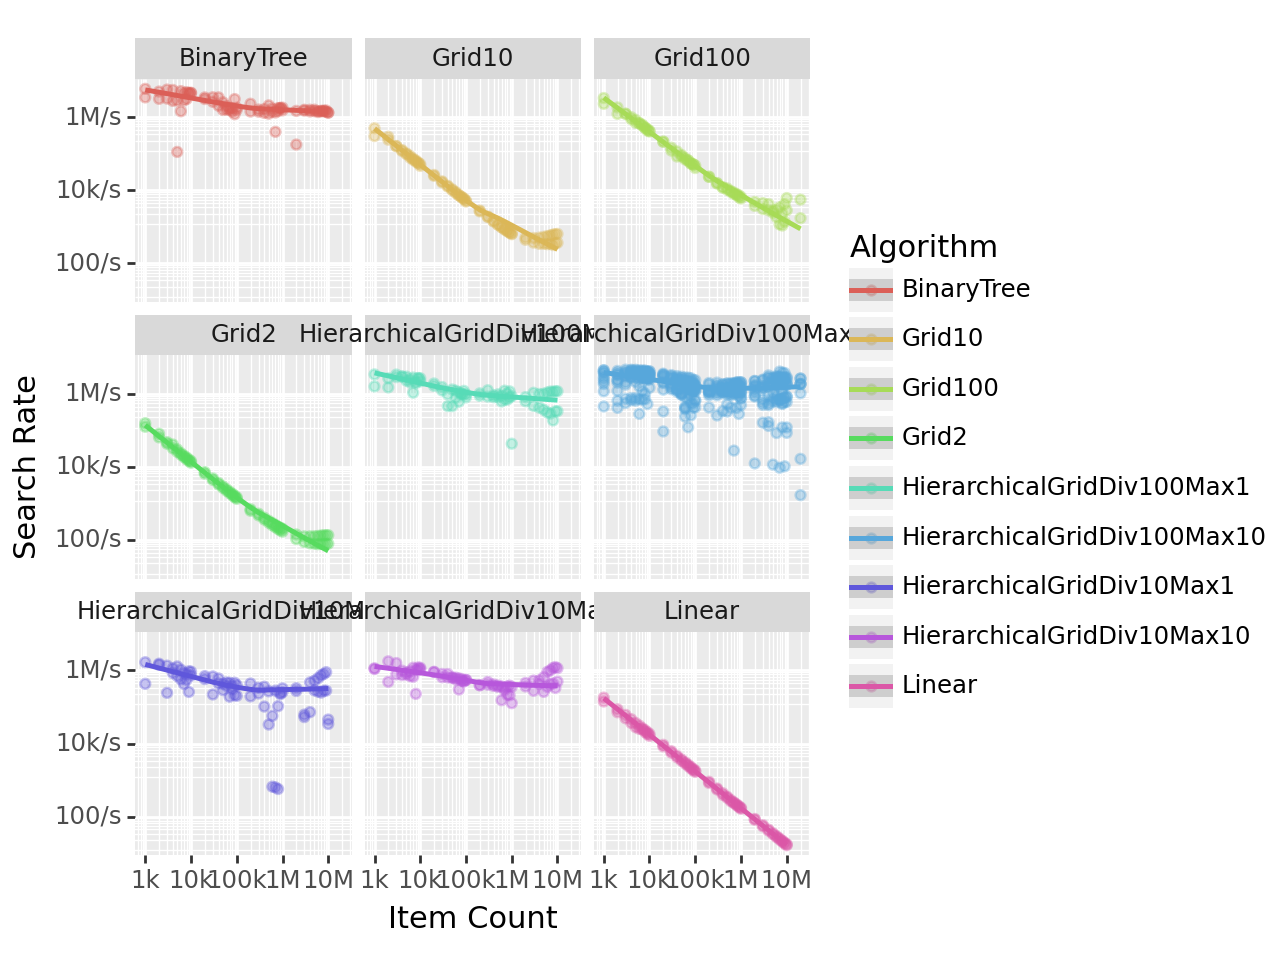

<Figure Size: (640 x 480)>

In [30]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Item Count", y="Search Rate", color="Algorithm"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Search Rate')
 + facet_wrap("Algorithm", scales="fixed")
 )